In [42]:
setwd("//AEBS199101/WallingNR/My Documents/HRDevelopment/Other")
packages=c('dplyr','ggplot2','tidyr','reshape2','tibble','caret','pROC')
lapply(packages,require,character.only=T)
credit = read.csv("default of credit card clients.csv",skip=1,header=T) %>% rename(default = default.payment.next.month) %>% column_to_rownames("ID") %>% mutate_at(vars(c(PAY_0:PAY_6,default)),factor)
head(credit)
nrow(credit)
theme_set(theme_grey())
summary(credit)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


[1] 30000

   LIMIT_BAL            SEX          EDUCATION        MARRIAGE    
 Min.   :  10000   Min.   :1.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median : 140000   Median :2.000   Median :2.000   Median :2.000  
 Mean   : 167484   Mean   :1.604   Mean   :1.853   Mean   :1.552  
 3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :1000000   Max.   :2.000   Max.   :6.000   Max.   :3.000  
                                                                  
      AGE            PAY_0           PAY_2           PAY_3      
 Min.   :21.00   0      :14737   0      :15730   0      :15764  
 1st Qu.:28.00   -1     : 5686   -1     : 6050   -1     : 5938  
 Median :34.00   1      : 3688   2      : 3927   -2     : 4085  
 Mean   :35.49   -2     : 2759   -2     : 3782   2      : 3819  
 3rd Qu.:41.00   2      : 2667   3      :  326   3      :  240  
 Max.   :79.00   3      :  322   4      :   99   4      :   76  
         

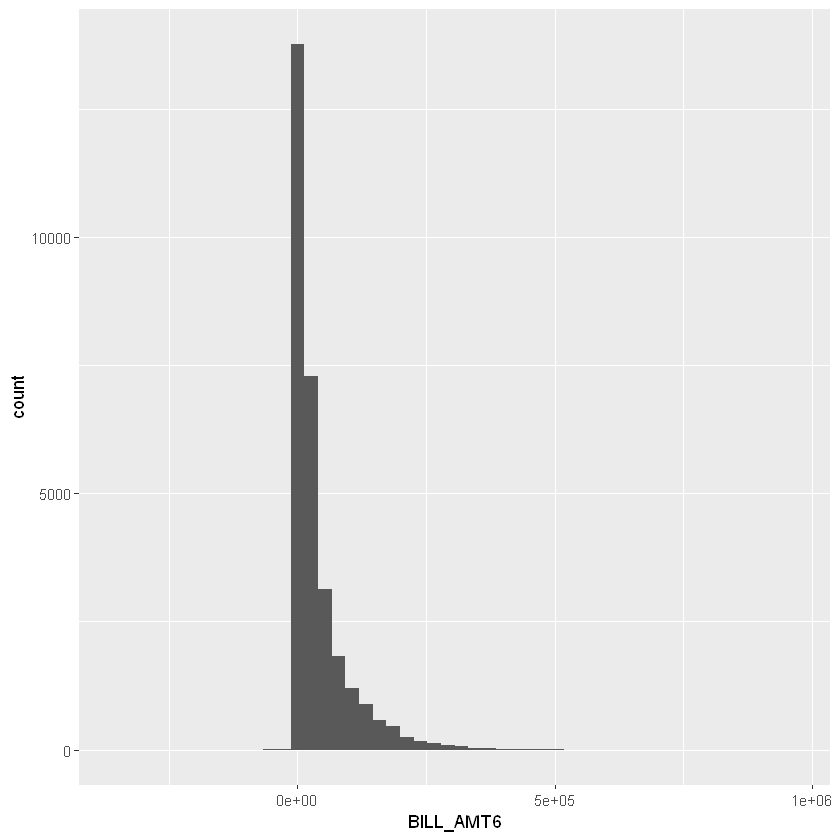

In [99]:
ggplot(data = credit, aes(x=BILL_AMT6)) + geom_histogram(bins = 50)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


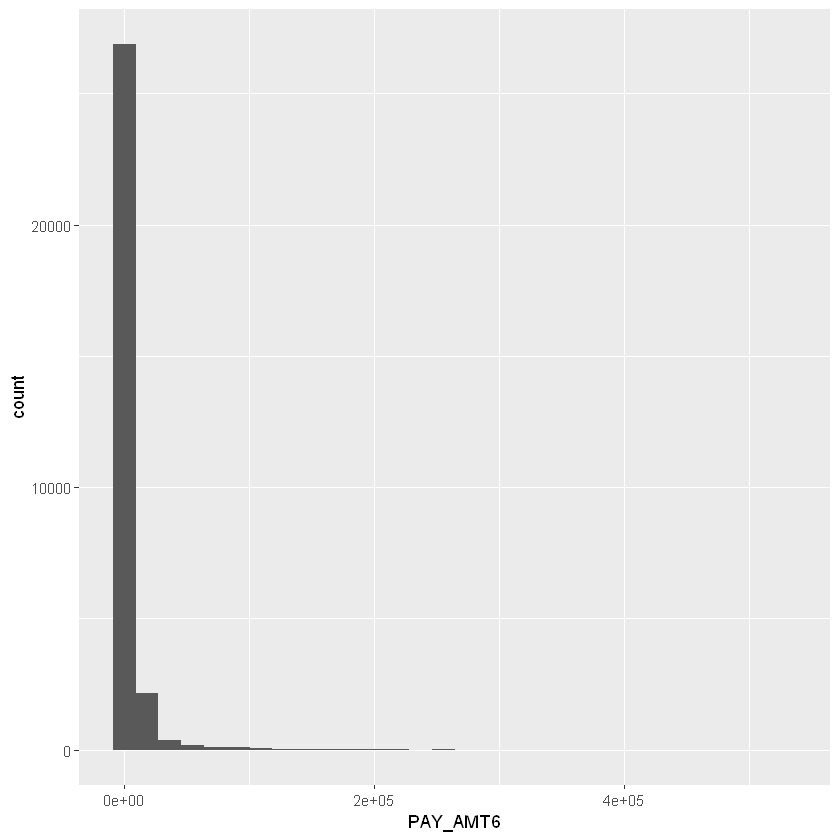

In [22]:
ggplot(data = credit, aes(x=PAY_AMT6)) + geom_histogram()

Warning message:
"Removed 697 rows containing missing values (geom_path)."

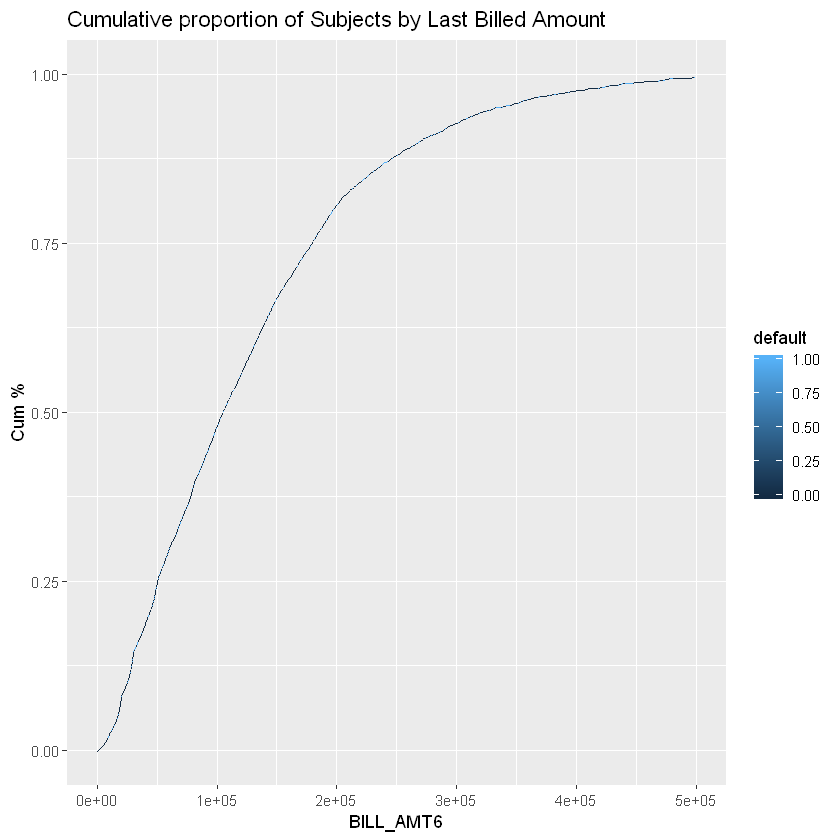

In [90]:
credit %>% select(BILL_AMT6,default) %>%
    arrange(BILL_AMT6) %>%
    mutate(cumsum = cumsum(BILL_AMT6),prop = cumsum/sum(BILL_AMT6)) %>%
    ggplot(aes(x=BILL_AMT6,y=prop,col=default)) + geom_line() + xlim(0,500000) + labs(title = "Cumulative proportion of Subjects by Last Billed Amount", y = "Cum %")

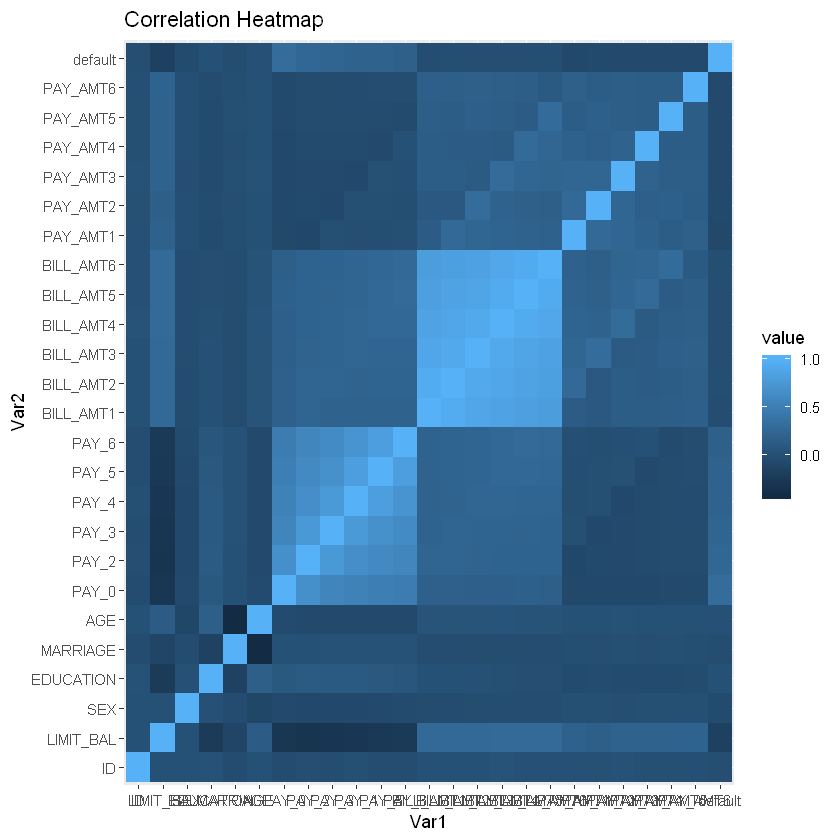

In [86]:
credit  %>% cor() %>% melt() %>% ggplot(aes(x = Var1,y=Var2,fill = value)) + geom_tile() + labs(title= "Correlation Heatmap")

Warning message:
"Removed 4461 rows containing missing values (geom_point)."

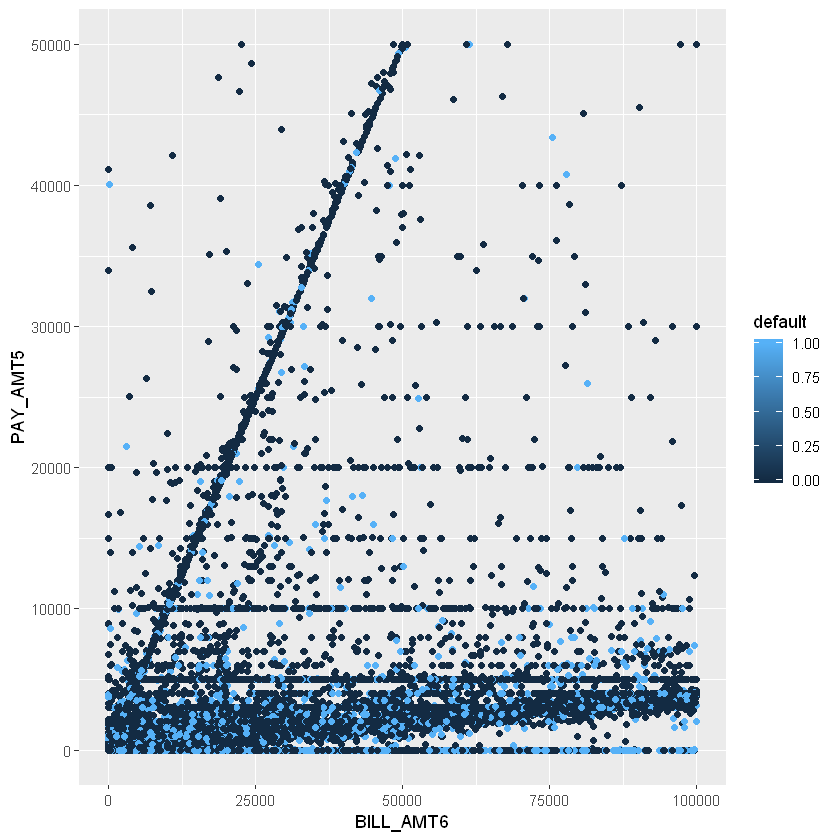

In [107]:
credit %>% ggplot(aes(x = BILL_AMT6,y=PAY_AMT5,col=default)) + geom_point() + xlim(0,1e5) + ylim(0,.5e5)

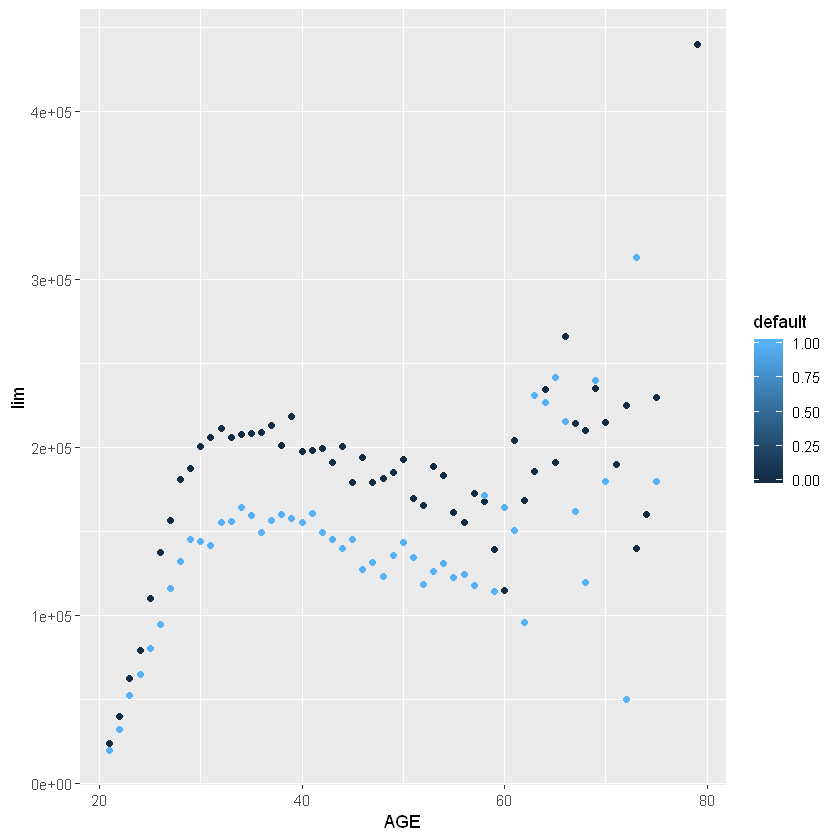

In [52]:
credit %>% group_by(AGE,default) %>% summarise(lim = mean(LIMIT_BAL)) %>% ggplot(aes(y= lim,x= AGE,col = default)) + geom_point() + labs(title = 'Average Limit Balance by Age and default')

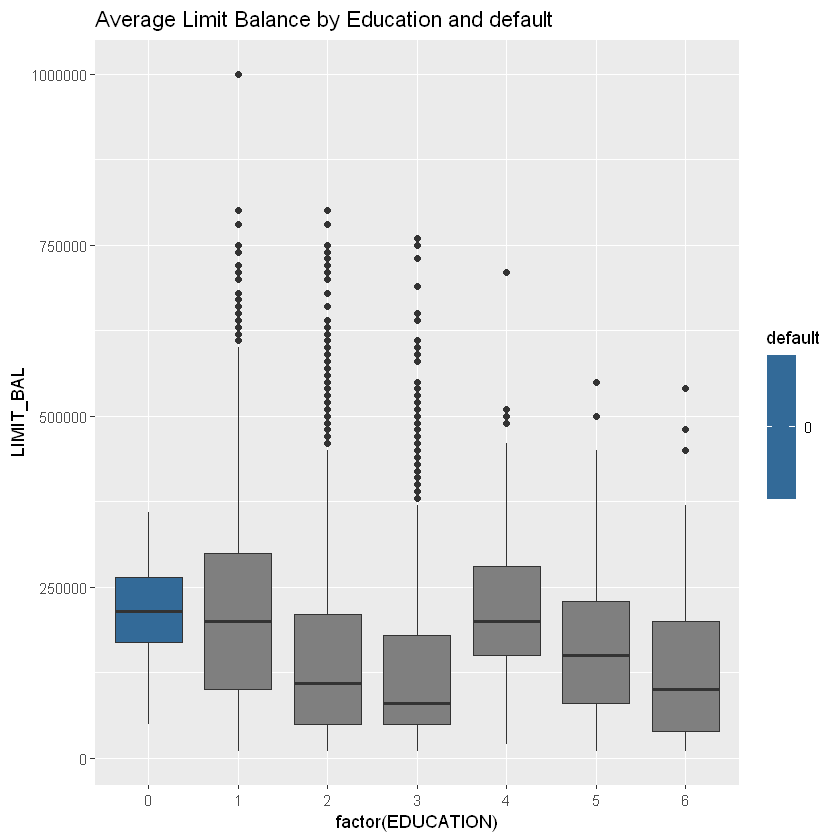

In [69]:
credit %>% select(EDUCATION,LIMIT_BAL,default)  %>%   ggplot(aes(y= LIMIT_BAL,x= factor(EDUCATION),fill = default)) + geom_boxplot() + labs(title = 'Average Limit Balance by Education and default')

In [47]:
n=nrow(credit)
indx = sample(1:n,n*.8)
train = credit[indx,]
test = credit[-indx,]

In [55]:
logistic_reg = glm(default~.,train,family = binomial)
summary(logistic_reg)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = default ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3498  -0.5952  -0.5055  -0.3304   3.4796  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.890e-01  1.581e-01  -5.622 1.89e-08 ***
LIMIT_BAL   -1.875e-06  1.952e-07  -9.606  < 2e-16 ***
SEX         -1.569e-01  3.614e-02  -4.342 1.41e-05 ***
EDUCATION   -5.442e-02  2.439e-02  -2.231  0.02569 *  
MARRIAGE    -1.151e-01  3.739e-02  -3.079  0.00208 ** 
AGE          5.415e-03  2.118e-03   2.556  0.01057 *  
PAY_0-1      4.728e-01  1.205e-01   3.922 8.77e-05 ***
PAY_00      -3.268e-01  1.302e-01  -2.510  0.01207 *  
PAY_01       7.771e-01  9.386e-02   8.280  < 2e-16 ***
PAY_02       2.004e+00  1.180e-01  16.979  < 2e-16 ***
PAY_03       2.017e+00  1.872e-01  10.770  < 2e-16 ***
PAY_04       1.457e+00  3.357e-01   4.340 1.42e-05 ***
PAY_05       5.479e-01  5.474e-01   1.001  0.31689    
PAY_06       1.158e+00  1.007e+00 

In [52]:
log_prb=predict(logistic_reg,test,'re')
log_prd = as.factor(if_else(log_prb>.5,1,0))
confusionMatrix(log_prd,test$default)



Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4434  867
         1  223  476
                                         
               Accuracy : 0.8183         
                 95% CI : (0.8083, 0.828)
    No Information Rate : 0.7762         
    P-Value [Acc > NIR] : 5.722e-16      
                                         
                  Kappa : 0.3696         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9521         
            Specificity : 0.3544         
         Pos Pred Value : 0.8364         
         Neg Pred Value : 0.6810         
             Prevalence : 0.7762         
         Detection Rate : 0.7390         
   Detection Prevalence : 0.8835         
      Balanced Accuracy : 0.6533         
                                         
       'Positive' Class : 0              
                                         

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
"Low definition shape."

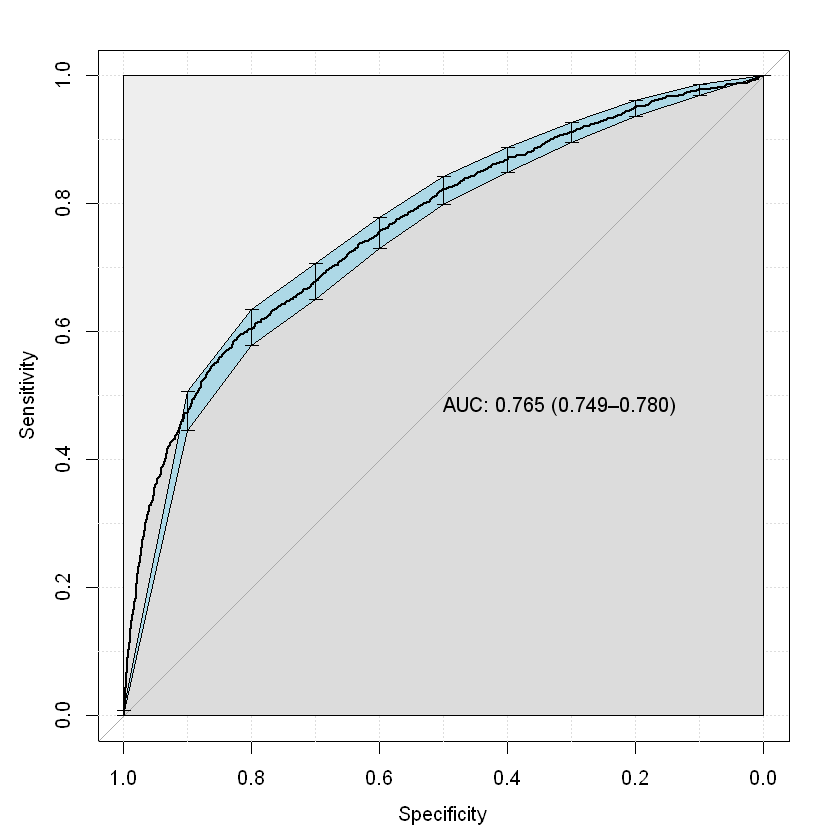

In [53]:
pROC_obj <- roc(test$default,log_prb,
            smoothed = TRUE,
            # arguments for ci
            ci=TRUE, ci.alpha=0.9, stratified=FALSE,
            # arguments for plot
            plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
            print.auc=TRUE, show.thres=TRUE)


sens.ci <- ci.se(pROC_obj)
plot(sens.ci, type="shape", col="lightblue")
## Warning in plot.ci.se(sens.ci, type = "shape", col = "lightblue"): Low
## definition shape.
plot(sens.ci, type="bars")

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"

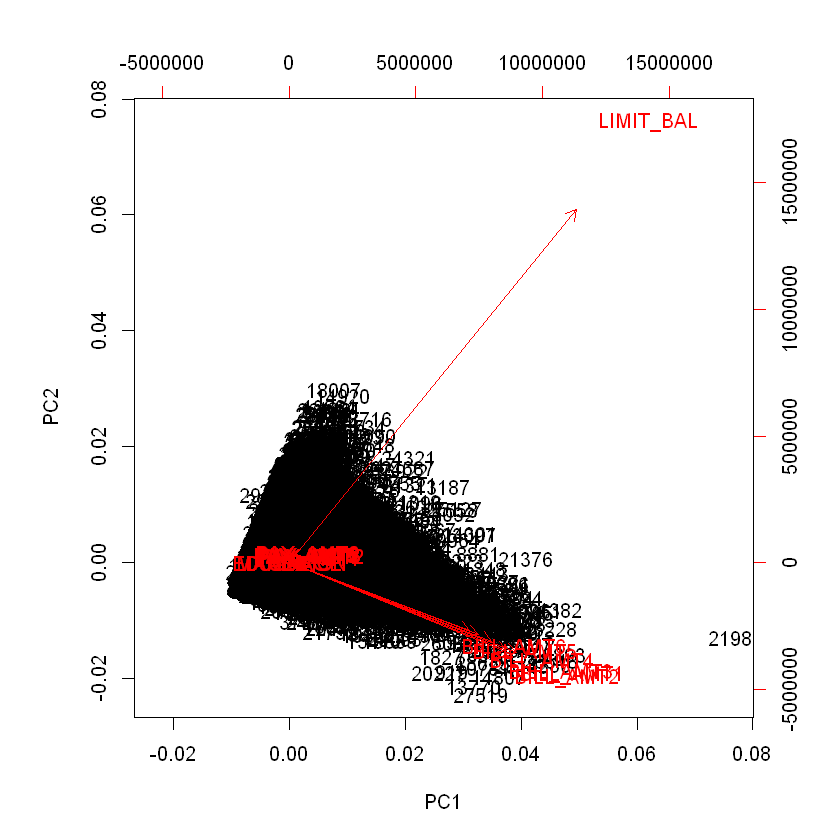

In [61]:
pca = credit %>% select_if(is.numeric) %>% prcomp()
biplot(pca)

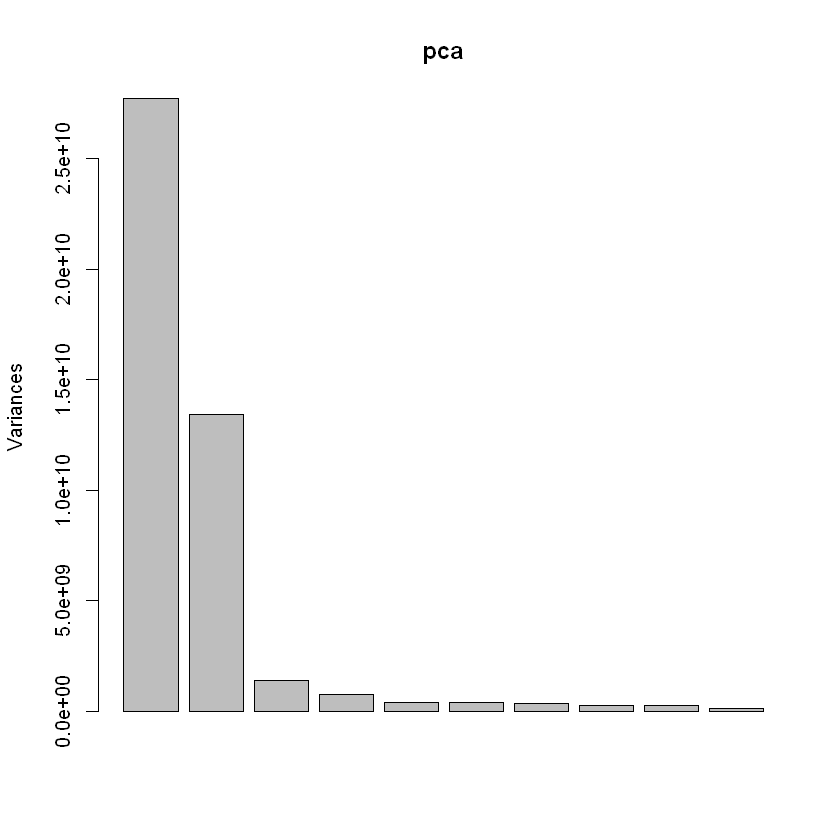

In [62]:
screeplot(pca)

In [63]:
pca

Standard deviations (1, .., p=17):
 [1] 1.665179e+05 1.158276e+05 3.723597e+04 2.773007e+04 2.068596e+04
 [6] 2.026594e+04 1.851205e+04 1.703000e+04 1.628316e+04 1.160856e+04
[11] 1.040855e+04 8.781660e+03 8.194615e+03 9.121236e+00 7.527308e-01
[16] 4.949011e-01 4.599622e-01

Rotation (n x k) = (17 x 17):
                    PC1           PC2           PC3           PC4           PC5
LIMIT_BAL  4.915907e-01  8.690227e-01  2.058514e-02  1.842153e-02  4.412604e-02
SEX       -3.528730e-08  1.761003e-07 -3.252389e-07  2.502470e-08  3.650414e-07
EDUCATION -3.672906e-07 -1.499723e-06  9.723171e-07 -2.071904e-07 -4.527891e-07
MARRIAGE  -1.924693e-07 -4.015163e-07 -7.482571e-08 -9.565022e-08 -6.620984e-07
AGE        5.568800e-06  8.313323e-06  4.130088e-06  2.620355e-07  4.903142e-06
BILL_AMT1  3.884535e-01 -2.213643e-01  5.489406e-01  2.049915e-01 -3.168781e-01
BILL_AMT2  3.813561e-01 -2.263758e-01  3.908989e-01  3.768117e-02 -1.152213e-02
BILL_AMT3  3.721794e-01 -2.165349e-01  4.816975e-02 -